In [61]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import Data

In [10]:
# importando todos os arquivos com os ativos escolhidos
folder = 'C:/Users/Pohlmann/Documents/FGV/9º Semestre/Fin2/Stocks/'
stocks = os.listdir(folder)
print(stocks, f"Foram selecionados {len(stocks)} ativos")

['AAPL.csv', 'AMZN.csv', 'ARZZ3.SA.csv', 'AZUL4.SA.csv', 'BBDC4.SA.csv', 'BSBR.csv', 'CIEL3.SA.csv', 'CRFB3.SA.csv', 'ELET3.SA.csv', 'GGBR4.SA.csv', 'GOOG.csv', 'ITSA4.SA.csv', 'LLIS3.SA.csv', 'OFSA3.SA.csv', 'PETR4.SA.csv', 'RADL3.SA.csv', 'SBSP3.SA.csv', 'SMLS3.SA.csv', 'SUZB3.SA.csv', 'VALE.csv'] Foram selecionados 20 ativos


In [25]:
# concatenando os ativos em um só dataframe
li = []
for file in stocks:
    atv = pd.read_csv(folder+file, engine='python', index_col=0)
    li.append(atv)
close = pd.concat(li, axis=1, keys=stocks)

C:\Users\Pohlmann\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """


In [28]:
# A cara do DataFrame finalizado e salvando o arquivo
close.head(3)
close.to_excel(folder+"Ações.xlsx")

AAPL.csv                                                  \
                  Open        High         Low       Close   Adj Close   
2015-07-13  126.040001  129.619995  125.040001  129.619995  119.458923   
2015-07-20  130.970001  132.970001  121.989998  124.500000  114.740288   
2015-07-27  123.089996  123.910004  120.910004  121.300003  111.791130   

                         AMZN.csv                                      \
               Volume        Open        High         Low       Close   
2015-07-13  147804400  462.320007  485.420013  458.160004  483.010010   
2015-07-20  344269000  492.570007  580.570007  475.700012  529.419983   
2015-07-27  191598600  527.750000  544.950012  523.119995  536.150024   

              ...     SUZB3.SA.csv                          VALE.csv        \
              ...              Low  Close  Adj Close Volume     Open  High   
2015-07-13    ...            20.01  20.01  18.942362      0     5.78  5.80   
2015-07-20    ...            20.01  20.01  18.942362      0     5.48  5.67   
2015-07-27    ...            20.01  20.01  18.942362      0     4.99  5.92   

                                             
             Low Close Adj Close     Volume  
2015-07-13  5.40  5.46  4.769442   97861900  
2015-07-20  4.96  5.05  4.411296  147320200  
2015-07-27  4.91  5.26  4.594737  170146000  

[3 rows x 120 columns]

### Modelando os retornos

In [46]:
# separando somente os preços de fechamento
cl = []
for stock in close.columns.levels[0]:
    cl.append(close[stock,'Close'])
prices = pd.concat(cl,axis=1,keys=close.columns.levels[0])

In [51]:
prices.head()

,AAPL.csv,AMZN.csv,ARZZ3.SA.csv,AZUL4.SA.csv,BBDC4.SA.csv,BSBR.csv,CIEL3.SA.csv,CRFB3.SA.csv,ELET3.SA.csv,GGBR4.SA.csv,GOOG.csv,ITSA4.SA.csv,LLIS3.SA.csv,OFSA3.SA.csv,PETR4.SA.csv,RADL3.SA.csv,SBSP3.SA.csv,SMLS3.SA.csv,SUZB3.SA.csv,VALE.csv
2015-07-13,129.619995,483.010010,22.709999,NaN,16.4037,5.40,31.527800,NaN,5.80779,6.26,672.929993,7.22492,40.320000,30.500000,11.41,41.990002,18.530001,56.310001,20.01,5.46
2015-07-20,124.500000,529.419983,20.799999,NaN,15.2141,4.79,30.472200,NaN,5.25800,5.84,623.559998,6.56811,39.619999,30.200001,10.03,41.849998,18.299999,53.349998,20.01,5.05
2015-07-27,121.300003,536.150024,21.420000,NaN,15.6410,4.67,30.243099,NaN,5.78780,5.89,625.609985,6.89651,37.939999,32.000000,10.49,43.310001,17.469999,54.910000,20.01,5.26
2015-08-03,115.519997,522.619995,20.180000,NaN,14.4116,4.38,28.506901,NaN,5.49791,6.01,635.299988,6.36285,34.650002,31.500000,9.69,41.020000,16.650000,54.599998,20.01,5.28
2015-08-10,115.959999,531.520020,20.260000,NaN,13.7570,4.16,27.847200,NaN,5.24800,5.60,657.119995,6.20686,32.900002,32.500000,9.30,40.400002,15.750000,54.910000,20.01,5.23


In [83]:
# variação percentual entre as semanas
returns = prices.pct_change()

In [84]:
num_ports = 100000
mat_pesos = np.zeros((num_ports, len(returns.columns)))
retornos = np.zeros(num_ports)
volatil = np.zeros(num_ports)

for x in range(num_ports):
    # Atribuindo pesos aleatórios
    pesos = np.array(np.random.random(len(returns.columns)))
    pesos = pesos/np.sum(pesos)
    # Guardar os pesos usados na matriz
    mat_pesos[x,:] = pesos
    # Retorno esperado
    retornos[x] = np.sum((returns.mean()*pesos))
    # Volatilidade esperada
    volatil[x] = np.sqrt(np.dot(pesos.T, np.dot(returns.cov(), pesos)))

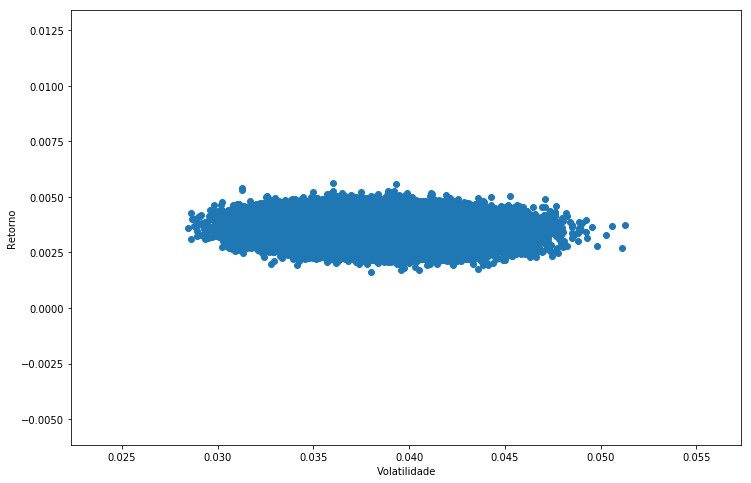

In [85]:
plt.figure(figsize=(12,8))
plt.scatter(volatil, retornos, cmap='viridis')
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.show()